<a href="https://colab.research.google.com/github/cocoisland/DS-Sprint-01-Dealing-With-Data/blob/master/DS_Unit_1_Sprint_Challenge_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 1

## Loading, cleaning, visualizing, and analyzing data

In this sprint challenge you will look at a dataset of the survival of patients who underwent surgery for breast cancer.

http://archive.ics.uci.edu/ml/datasets/Haberman%27s+Survival

Data Set Information:
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Attribute Information:
1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)
4. Survival status (class attribute)
-- 1 = the patient survived 5 years or longer
-- 2 = the patient died within 5 year

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- Validate that you have no missing values.
- Add informative names to the features.
- The survival variable is encoded as 1 for surviving >5 years and 2 for not - change this to be 0 for not surviving and 1 for surviving >5 years (0/1 is a more traditional encoding of binary variables)

At the end, print the first five rows of the dataset to demonstrate the above.

In [37]:
# TODO
import pandas as pd

patient_url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data'
patient = pd.read_csv(patient_url, header=None, na_values=['?'],names=['ages','years_ops','nodes_detected','survival_status'])
#patient.head()
print(patient.shape)
print(patient.count())

#confirm all 306 instances downloaded fine.
!curl $patient_url | wc


patient.isna().sum()


(306, 4)
ages               306
years_ops          306
nodes_detected     306
survival_status    306
dtype: int64
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  3103  100  3103    0     0  22485      0 --:--:-- --:--:-- --:--:-- 22485
    306     306    3103


ages               0
years_ops          0
nodes_detected     0
survival_status    0
dtype: int64

In [23]:
#pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
#pd.set_option('display.width', 1000)

patient.head()

,ages,years_ops,nodes_detected,survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [3]:
patient['survival_status'].value_counts() # survival = 1, non-survival=2

1    225
2     81
Name: survival_status, dtype: int64

In [38]:
# convert survival to 1 and non-survival =0 because (1,0) value works well for mean function.
import numpy as np

patient['survival_status'] = np.where(patient['survival_status'] == 2, 0,1)
patient['survival_status'].value_counts()

1    225
0     81
Name: survival_status, dtype: int64

In [36]:
'''
Years of Operation = the year the patient had her operation.
Since every patient survived or not recorded in file, had a Years_of_operation,
the Years_of_operation had no impact on survival.
'''
patient['years_ops'].value_counts()

58    36
64    31
63    30
66    28
65    28
60    28
59    27
61    26
67    25
62    23
68    13
69    11
Name: years_ops, dtype: int64

## Part 2 - Examine the distribution and relationships of the features

Explore the data - create at least *2* tables (can be summary statistics or crosstabulations) and *2* plots illustrating the nature of the data.

This is open-ended, so to remind - first *complete* this task as a baseline, then go on to the remaining sections, and *then* as time allows revisit and explore further.

Hint - you may need to bin some variables depending on your chosen tables/plots.

In [5]:
# TODO
patient.describe()

,ages,years_ops,nodes_detected,survival_status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,0.735294
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,0.000000
25%,44.000000,60.000000,0.000000,0.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,1.000000
max,83.000000,69.000000,52.000000,1.000000


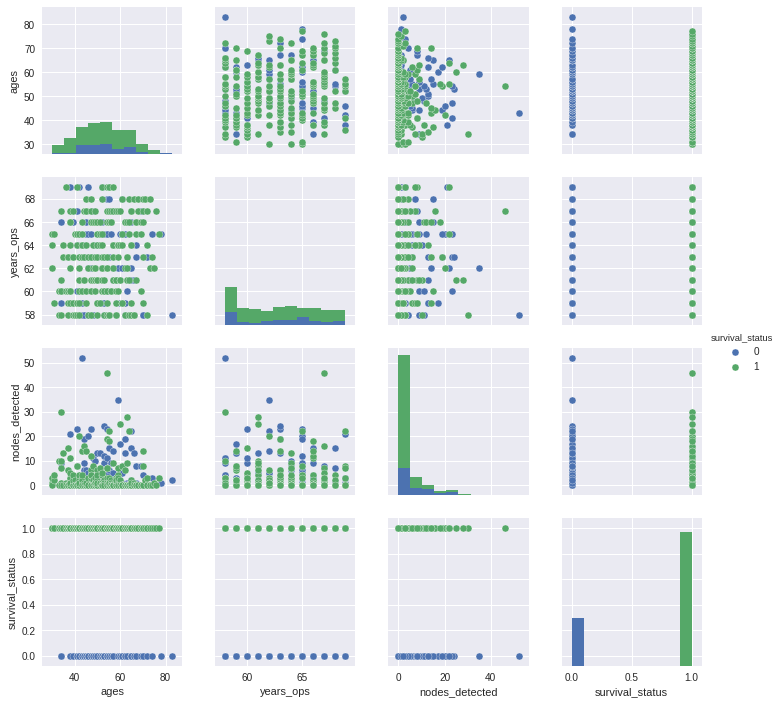

In [6]:
import seaborn as sns

sns.pairplot(patient, hue='survival_status');

# Year_of_operation has no impact on survival.

In [39]:

#bin_slice=5
age_bin = pd.cut(patient['ages'], bins=[30,40,50,60,70,80], right=False)
year_bin = pd.cut(patient['years_ops'], 4)
#node_bin = pd.cut(patient['nodes_detected'], 8) # higher than 8, messy heatmap

# Zero nodes detected, has highest survival status
node_bin = pd.cut(patient['nodes_detected'], bins=[0, 1, 5, 53], right=False)
#node_bin.value_counts()

survival_bin = patient['survival_status']

#print('Age :',age_bin.unique())
print('Ages value count:', age_bin.value_counts())
#print('Year of operation :', year_bin.unique())
#print('Nodes detected :',node_bin.unique())
print('Nodes value count', node_bin.value_counts())
print('Survival :', survival_bin.unique())





Ages value count: [50, 60)    99
[40, 50)    84
[60, 70)    62
[30, 40)    40
[70, 80)    20
Name: ages, dtype: int64
Nodes value count [0, 1)     136
[1, 5)      94
[5, 53)     76
Name: nodes_detected, dtype: int64
Survival : [1 0]


In [0]:
pd.reset_option('^display')

# seaborn pairplot showed year_of_operation has no impact on survival or not.
# hence excluding years_ops from crosstab
ct = pd.crosstab(survival_bin, [age_bin,node_bin])

# bar plot gives no insight value.
#ct.plot(kind='bar', stacked=False);

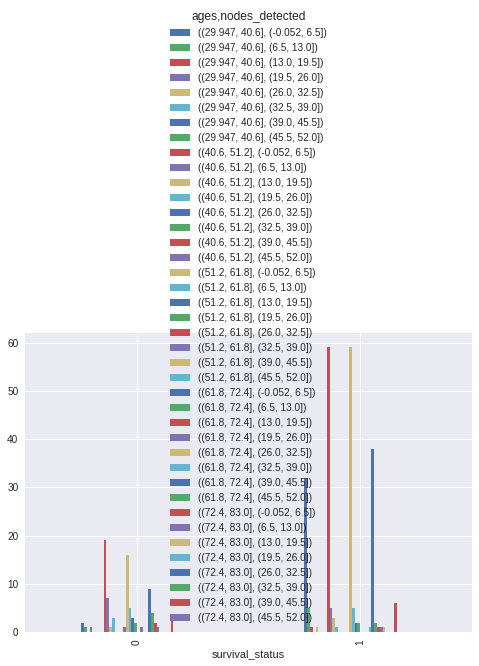

In [40]:
ct.plot(kind='bar', stacked=False)

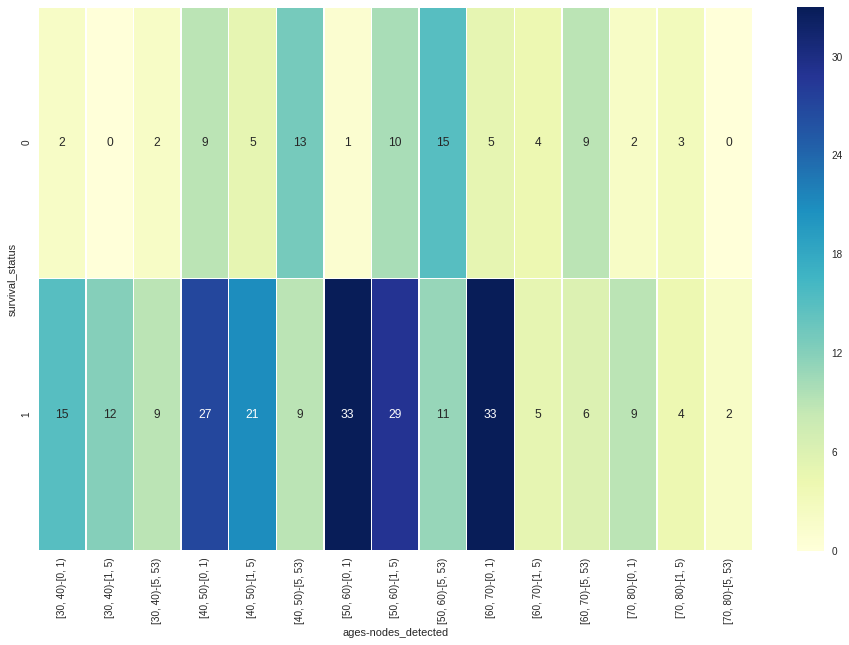

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(16,10))

sns.heatmap(ct, annot=True, linewidths=0.5, cmap='YlGnBu' , ax=ax);

 
             
          age group(30-40) 
              nodes_detected(0)= 15/(15+2)  =88% survival
              nodes_detected(1-5)= 12/(12+0)=100% survival
              nodes_detected(5-53)= 9/(9+2) =82%
              
          age group(40-50) 
              nodes_detected(0)= 27/(27+9)  =75% survival
              nodes_detected(1-5)= 21/(21+5)=81% survival
              nodes_detected(5-53)= 9/(9+13) =40%
           
           age group(50-60) 
              nodes_detected(0)= 33/(33+1)  =97% survival
              nodes_detected(1-5)= 29/(29+10)=74% survival
              nodes_detected(5-53)= 11/(11+15) =42%
            
            age group(60-70) 
              nodes_detected(0)= 33/(33+5)  =87% survival
              nodes_detected(1-5)= 5/(5+4)=55% survival
              nodes_detected(5-53)= 6/(6+9) =40%
          

In [32]:

age_bin = pd.cut(patient['ages'], 5)
year_bin = pd.cut(patient['years_ops'], 4)
node_bin = pd.cut(patient['nodes_detected'], 8) # higher than 8, messy heatmap
survival_bin = patient['survival_status']

#print('Age :',age_bin.unique())
print('Ages value count:', age_bin.value_counts())

#print('Nodes detected :',node_bin.unique())
print('Nodes value count', node_bin.value_counts())
print('Survival :', survival_bin.unique())


Ages value count: (40.6, 51.2]      99
(51.2, 61.8]      96
(61.8, 72.4]      59
(29.947, 40.6]    43
(72.4, 83.0]       9
Name: ages, dtype: int64
Nodes value count (-0.052, 6.5]    243
(6.5, 13.0]       34
(13.0, 19.5]      13
(19.5, 26.0]      11
(45.5, 52.0]       2
(26.0, 32.5]       2
(32.5, 39.0]       1
(39.0, 45.5]       0
Name: nodes_detected, dtype: int64
Survival : [1 0]


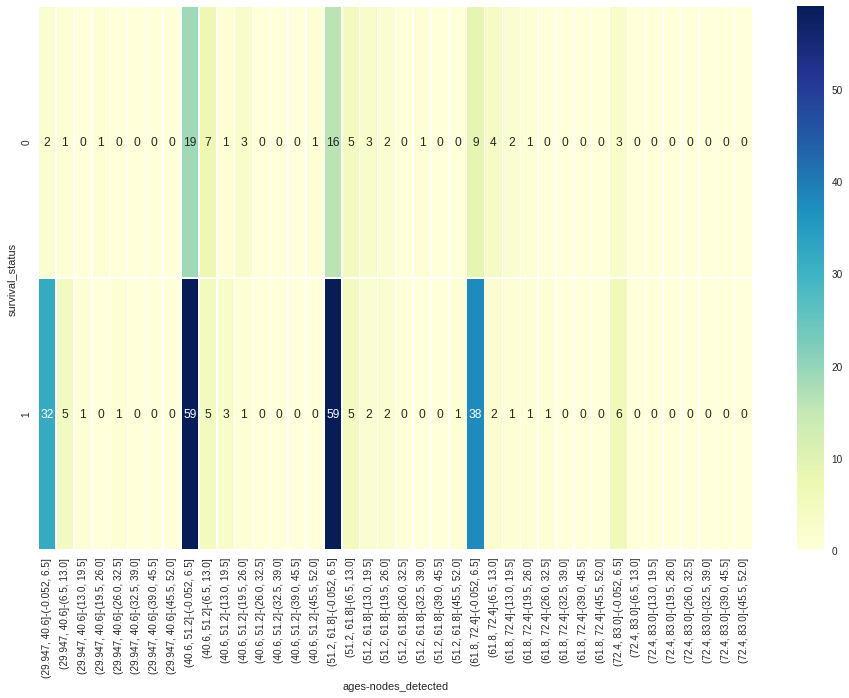

In [29]:

import seaborn as sns
import matplotlib.pyplot as plt

ct = pd.crosstab(survival_bin, [age_bin,node_bin])
fig, ax = plt.subplots(figsize=(16,10))
sns.heatmap(ct, annot=True, linewidths=0.5, cmap='YlGnBu' , ax=ax);

## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:
      
      From crosstab(survival against age and nodes_detected) and seaborn heatmap, 
      groups with the highest survival:
          
       age group(30-40) 
          nodes_detected(0)= 15/(15+2)  =88% survival
          nodes_detected(1-5)= 12/(12+0)=100% survival
          nodes_detected(5-53)= 9/(9+2) =82%

      age group(40-50) 
          nodes_detected(0)= 27/(27+9)  =75% survival
          nodes_detected(1-5)= 21/(21+5)=81% survival
          nodes_detected(5-53)= 9/(9+13) =40%

       age group(50-60) 
          nodes_detected(0)= 33/(33+1)  =97% survival
          nodes_detected(1-5)= 29/(29+10)=74% survival
          nodes_detected(5-53)= 11/(11+15) =42%

        age group(60-70) 
          nodes_detected(0)= 33/(33+5)  =87% survival
          nodes_detected(1-5)= 5/(5+4)=55% survival
          nodes_detected(5-53)= 6/(6+9) =40%
          
          age group(30-40) with nodes_detected(0-6)= 32/(32+2) =94% survival   
          age group(30-40) with nodes_detected(6-13)= 5/(5+1) =83% survival
          age group(40-50) with nodes_detected(0-6)= 59/(59+19)=76% survival
          age group(51-61) with nodes_detected(0-6)= 59/(59+16)=79% survival
          age group(62-73) with nodes_detected(0-6)= 38/(38+9) =80% survival

- What is at least one feature that looks to have a positive correlation with survival?

      Zero nodes detected has highest positive correlation to survival.
      
- What is at least one feature that looks to have a negative correlation with survival?

       Year of operation had zero correlation with survival because every patient on file, had a year_of_operation regardless survived or not.
       1 or more nodes detected have a negative correlation with survival.
       
- How are those two features related with each other, and what might that mean?

         Women under 40 with Zero node detected had highest chance surviving cancer.

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.